# **Mysterious circles**

In [1]:
!pip3 install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 38 kB/s 


In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, roc_auc_score

In [3]:
url = 'https://docs.google.com/spreadsheets/d/1n3_s-MAVuZCGsfqmU9RhoUYcnM_QU4o2NQvAmVfwgpc/edit?usp=sharing'

### **In the file dataset.csv you will find a synthetic selection. It contains 5 attributes and one target variable.**

### **It is necessary to train a classifier with the highest generalization ability on this data. The metric used to evaluate the quality of the classifier is ROC-AUC. It should be noted in advance that if it is not possible to obtain a ROC-AUC above 70%, it means that some strong characters have not been invented. At the same time, it is suggested to pay attention not only to the accuracy of the classifier, but also to the design of the code, the study of the data, and a competent assessment of the quality of the resulting model - all this is also evaluated, and some of it can also help to create a better model.**

### **The solution must be submitted in the form of a Python script or a Jupiter Notebook. Comments and diagrams are welcome.**

In [4]:
id = url.split('/')[5]

In [5]:
df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{id}/export?format=csv')

In [6]:
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.433306,-4.106981,1.252722,4.842634,7.610817,1
1,-0.216705,3.832332,-10.054348,-1.106758,1.987823,0
2,8.574821,-2.495187,5.404009,-6.219058,6.954602,1
3,7.673529,-4.234502,8.135008,3.748393,3.457908,0
4,3.548824,-2.588106,-2.095070,7.993792,-3.523852,1


In [7]:
#checking for data types
df.dtypes.value_counts()

float64    5
int64      1
dtype: int64

In [8]:
#Checking data for a null value
df.isna().mean()

feature_1    0.0
feature_2    0.0
feature_3    0.0
feature_4    0.0
feature_5    0.0
target       0.0
dtype: float64

In [9]:
df['target'].mean()

0.6

## SPLIT DATA

In [10]:
X = df.drop(columns=['target']).copy()
Y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## CATBOOST

In [12]:
model = CatBoostClassifier(verbose=100, eval_metric='AUC')

In [13]:
model.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.038062
0:	test: 0.5224025	best: 0.5224025 (0)	total: 49.6ms	remaining: 49.5s
100:	test: 0.5137499	best: 0.5434278 (2)	total: 304ms	remaining: 2.71s
200:	test: 0.5105113	best: 0.5434278 (2)	total: 574ms	remaining: 2.28s
300:	test: 0.5235173	best: 0.5434278 (2)	total: 932ms	remaining: 2.16s
400:	test: 0.5204743	best: 0.5434278 (2)	total: 1.37s	remaining: 2.05s
500:	test: 0.5185332	best: 0.5434278 (2)	total: 1.65s	remaining: 1.64s
600:	test: 0.5193519	best: 0.5434278 (2)	total: 1.93s	remaining: 1.28s
700:	test: 0.5199491	best: 0.5434278 (2)	total: 2.19s	remaining: 934ms
800:	test: 0.5232856	best: 0.5434278 (2)	total: 2.45s	remaining: 608ms
900:	test: 0.5228891	best: 0.5434278 (2)	total: 2.71s	remaining: 298ms
999:	test: 0.5237644	best: 0.5434278 (2)	total: 2.96s	remaining: 0us

bestTest = 0.54342778
bestIteration = 2

Shrink model to first 3 iterations.


In [14]:
auc = model.predict_proba(X_test)[:,1]

In [15]:
#Calculate roc auc
roc_auc = roc_auc_score(y_true=y_test, y_score=auc)
roc_auc

0.5434277799803315

In [16]:
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.433306,-4.106981,1.252722,4.842634,7.610817,1
1,-0.216705,3.832332,-10.054348,-1.106758,1.987823,0
2,8.574821,-2.495187,5.404009,-6.219058,6.954602,1
3,7.673529,-4.234502,8.135008,3.748393,3.457908,0
4,3.548824,-2.588106,-2.095070,7.993792,-3.523852,1


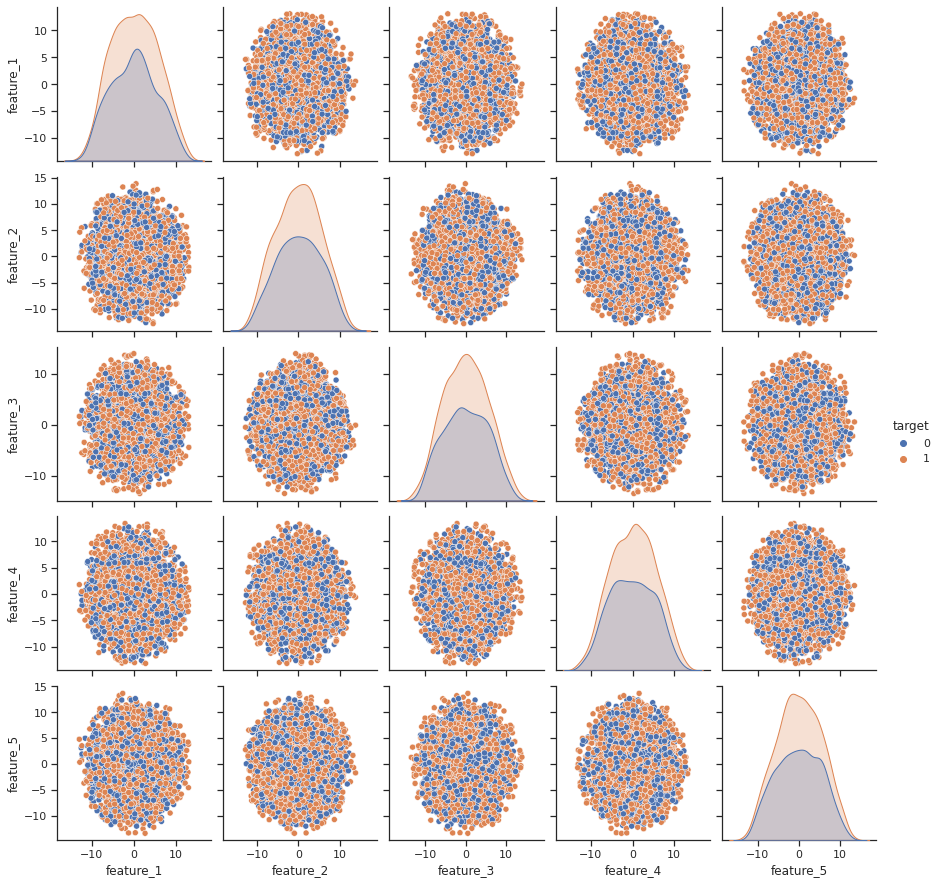

In [17]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="target")

In [18]:
from sklearn.manifold import MDS


In [19]:
mds = MDS()

In [20]:
df_trans = mds.fit_transform(X)

In [21]:
df_trans_ = pd.DataFrame(df_trans)
df_trans_['target'] = df['target']
df_trans_

,0,1,target
0,8.250624,3.638354,1
1,-2.418940,-9.669393,0
2,-4.350135,14.397240,1
3,1.073447,13.359188,0
4,1.326455,-2.518373,1
...,...,...,...
2995,9.289660,-5.754764,0
2996,14.152238,-0.773079,0
2997,8.617371,7.745492,1
2998,5.581464,9.632507,0


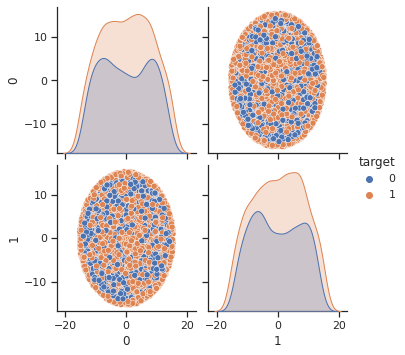

In [22]:
sns.set_theme(style="ticks")
sns.pairplot(df_trans_, hue="target")

## **here we can see a kind of nested circle**

In [23]:
from sklearn.manifold import TSNE

In [24]:
tsne = TSNE()

In [25]:
tsne_trans = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [26]:
tsne_trans_ = pd.DataFrame(tsne_trans)
tsne_trans_['target'] = df['target']
tsne_trans_

,0,1,target
0,-5.470798,-43.153336,1
1,-45.297428,-35.201378,0
2,-26.926601,-14.846457,1
3,-18.400751,-21.288782,0
4,9.688292,-3.685036,1
...,...,...,...
2995,35.897217,-19.317661,0
2996,37.125149,-16.006735,0
2997,46.309330,6.444836,1
2998,50.968868,-31.722946,0


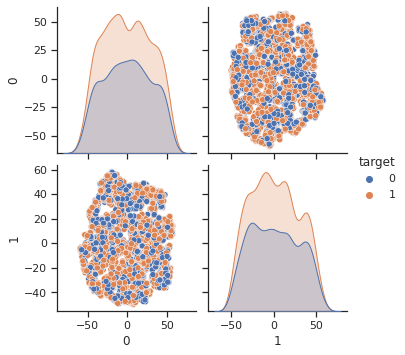

In [27]:
sns.set_theme(style="ticks")
sns.pairplot(tsne_trans_, hue="target")

## **using TSNE we will not be able to achieve the same result**

In [30]:
from sklearn.cluster import DBSCAN

In [92]:
epss = [0.1,0.5,1,1.5,2,2.5]
min_samples = [2,3,4,5,10,20]

In [97]:
res = []

for eps in epss:
  for min_sample in min_samples:
    dbscan = DBSCAN(eps=eps, min_samples=min_sample)
    dbscan.fit(X)
    df['cluster'] = dbscan.labels_
    res.append((df['cluster'].nunique(), eps, min_sample))

In [98]:
dbscan_df = pd.DataFrame(res)

In [99]:
dbscan_df.columns = ['n_clusters', 'eps', 'min_samples']

In [100]:
dbscan_df.sort_values('n_clusters', ascending=False)

,n_clusters,eps,min_samples
30,477,2.5,2
24,249,2.0,2
31,163,2.5,3
18,73,1.5,2
32,52,2.5,4
25,39,2.0,3
12,11,1.0,2
33,9,2.5,5
26,4,2.0,4
19,3,1.5,3


In [101]:
dbscan = DBSCAN(eps=0.695735, min_samples=2)
dbscan.fit(X)
df['cluster'] = dbscan.labels_
df['cluster'].value_counts()

-1    2996
 0       2
 1       2
Name: cluster, dtype: int64

## **I tried using DBSCAN to separate our spheres but without success. If you noticed my mistake, I am waiting for your ideas :)**